# Part I - Prosper Loan Data Exploration
## by Paulina Romanczuk

## Introduction
>This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

>The goal is to explore about 10-15 of them



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#loading the dataset
df = pd.read_csv("prosperLoanData.csv")
print(df.head())
print(df.shape)

                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18             

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

Do a quality check of some of the columns

In [4]:
#check if columns that are supposed to have unique values have indeed unique values

print(df[['ListingKey']].nunique())
#looks like we have 113066 unique values when we have 113937 supposedly unique values

ListingKey    113066
dtype: int64


In [5]:
#remove duplicated rows
#create copy of dataset

copy_df = df.copy()
copy_df.drop_duplicates(subset=['ListingKey'], keep='first', inplace=True)

In [6]:
print(copy_df.shape)
print(copy_df.info())

(113066, 81)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113066 non-null  object 
 1   ListingNumber                        113066 non-null  int64  
 2   ListingCreationDate                  113066 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113066 non-null  int64  
 5   LoanStatus                           113066 non-null  object 
 6   ClosedDate                           55076 non-null   object 
 7   BorrowerAPR                          113041 non-null  float64
 8   BorrowerRate                         113066 non-null  float64
 9   LenderYield                          113066 non-null  float64
 10  EstimatedEffectiveYield              83982 non-null   float64
 11  

In [7]:
#check if there are any loans that have closing date < opening date
#create column daysLoanOustanding in order to check that

#first conversion of Creation Date and Closed Date columns to datetime type
copy_df['ClosedDate'] = pd.to_datetime(copy_df['ClosedDate'])
copy_df['ListingCreationDate'] = pd.to_datetime(copy_df['ListingCreationDate'])

#create new column
copy_df['daysLoanOutstanding'] = (copy_df['ClosedDate'] - copy_df['ListingCreationDate']).dt.days
copy_df['daysLoanOutstanding'] = copy_df['daysLoanOutstanding'].apply(lambda x: 0 if pd.isna(x) else x)

#check if new column is created and print first 25 rows
print(copy_df.shape)
print(copy_df.head(25))


(113066, 82)
                 ListingKey  ListingNumber     ListingCreationDate  \
0   1021339766868145413AB3B         193129 2007-08-26 19:09:29.263   
1   10273602499503308B223C1        1209647 2014-02-27 08:28:07.900   
2   0EE9337825851032864889A          81716 2007-01-05 15:00:47.090   
3   0EF5356002482715299901A         658116 2012-10-22 11:02:35.010   
4   0F023589499656230C5E3E2         909464 2013-09-14 18:38:39.097   
5   0F05359734824199381F61D        1074836 2013-12-14 08:26:37.093   
6   0F0A3576754255009D63151         750899 2013-04-12 09:52:56.147   
7   0F1035772717087366F9EA7         768193 2013-05-05 06:49:27.493   
8   0F043596202561788EA13D5        1023355 2013-12-02 10:43:39.117   
10  0F123545674891886D9F106         587746 2012-05-10 07:04:01.577   
11  0F1734025150298088A5F2B         213551 2007-10-09 20:28:33.640   
12  0F1A3597143888805163EF7        1081604 2013-12-15 20:01:10.757   
13  0F1C3583260311305D68F87         840820 2013-07-15 16:28:28.087   
14  0F3

In [8]:
print(copy_df.daysLoanOutstanding.describe())
copy_df.shape

count    113066.000000
mean        292.507606
std         389.735830
min       -1383.000000
25%           0.000000
50%           0.000000
75%         524.000000
max        2018.000000
Name: daysLoanOutstanding, dtype: float64


(113066, 82)

Minimum value is negative, so it means there are some loans that were closed before they opened, this is not correct

In [9]:
print(copy_df.query('daysLoanOutstanding<0'))

                     ListingKey  ListingNumber     ListingCreationDate  \
108297  DEAA359893047281162F432        1099553 2013-12-27 12:02:50.107   

       CreditGrade  Term LoanStatus ClosedDate  BorrowerAPR  BorrowerRate  \
108297         NaN    36  Defaulted 2010-03-16      0.14206        0.1139   

        LenderYield  ...  LP_CollectionFees  LP_GrossPrincipalLoss  \
108297       0.1039  ...                0.0                    0.0   

        LP_NetPrincipalLoss  LP_NonPrincipalRecoverypayments PercentFunded  \
108297                  0.0                              0.0           1.0   

        Recommendations  InvestmentFromFriendsCount  \
108297                0                           0   

       InvestmentFromFriendsAmount Investors daysLoanOutstanding  
108297                         0.0         1             -1383.0  

[1 rows x 82 columns]


In [10]:
#there is only one such incorrect loan, filter it out 
#but also include null values in newly created column since these will be the value for current loans
copy_df = copy_df[copy_df['daysLoanOutstanding'] >= 0 | pd.isna(copy_df['daysLoanOutstanding'])]

#check shape if only one row was deleted
copy_df.shape

(113065, 82)

In [11]:
# check if there are any BorrowerRate =< 0 or BorrowerAPR < 0

copy_df[['BorrowerRate','BorrowerAPR']].describe()
print(copy_df.query('BorrowerRate==0'))

#there is min borrower rate=0 but the APR is not equal to zero, so these do not seem to be a mistake

                     ListingKey  ListingNumber     ListingCreationDate  \
29859   75DB3366773363492DDD729          34125 2006-08-25 11:10:06.193   
46874   3F5C3389508503122919326         143562 2007-05-28 06:40:54.803   
65259   BB4E34191946516388AD563         310792 2008-04-15 05:35:10.670   
76858   7ADE3385294777364BFEDD6         115163 2007-03-24 10:03:30.717   
78401   D51133706364386842C7D6B          49783 2006-10-18 06:15:54.327   
78920   CBC03418552010666B09260         319969 2008-04-28 11:48:10.400   
90051   88D333775844604529658CA          77055 2006-12-21 15:20:20.630   
112717  C52F3426964405073574757         369381 2008-07-17 22:44:53.000   

       CreditGrade  Term LoanStatus ClosedDate  BorrowerAPR  BorrowerRate  \
29859           AA    36  Completed 2006-10-17      0.01650           0.0   
46874           HR    36  Defaulted 2010-10-05      0.01315           0.0   
65259           HR    36  Completed 2011-04-18      0.01987           0.0   
76858            C    36 

In [12]:
copy_df.LoanOriginalAmount.describe()

count    113065.000000
mean       8314.813735
std        6237.011449
min        1000.000000
25%        4000.000000
50%        6300.000000
75%       12000.000000
max       35000.000000
Name: LoanOriginalAmount, dtype: float64

maximum amount of loan given by prosper is 35k

### What is the structure of your dataset?

> After preliminary wrangling, the dataset consists of 113065 rows and 82 columns

### What is/are the main feature(s) of interest in your dataset?

> ListingCategory - what type of loans are most popular ones? How the usual interest rates differ between them? 
> Medical loans - knowing the health system in US, how popular are they and what are the amounts that are usually being taken?
> Is there a tendency to take loans for smaller, consumer stuff and start spiraling in debt? Take a subset of dataframe for customers that have more than 1 loan and see how it started and what's the tendency? (MemberKey)

> What affects the borrower’s APR or interest rate?

> Is there anything in common for clients that defaulted?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Columns like: Term, BorrowerRate, ListingCategory, ProsperScore, EmploymentStatus, IsBorrowerHomeowner, CredtScoreRange, IncomeVerifiable, DebtToIncomeRatio and MonthlyLoanPayment


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


What income ranges looks like for loan takers?

$25,000-49,999    0.282492
$50,000-74,999    0.271959
$100,000+         0.152019
$75,000-99,999    0.148401
Not displayed     0.068465
$1-24,999         0.064043
Not employed      0.007129
$0                0.005492
Name: IncomeRange, dtype: float64


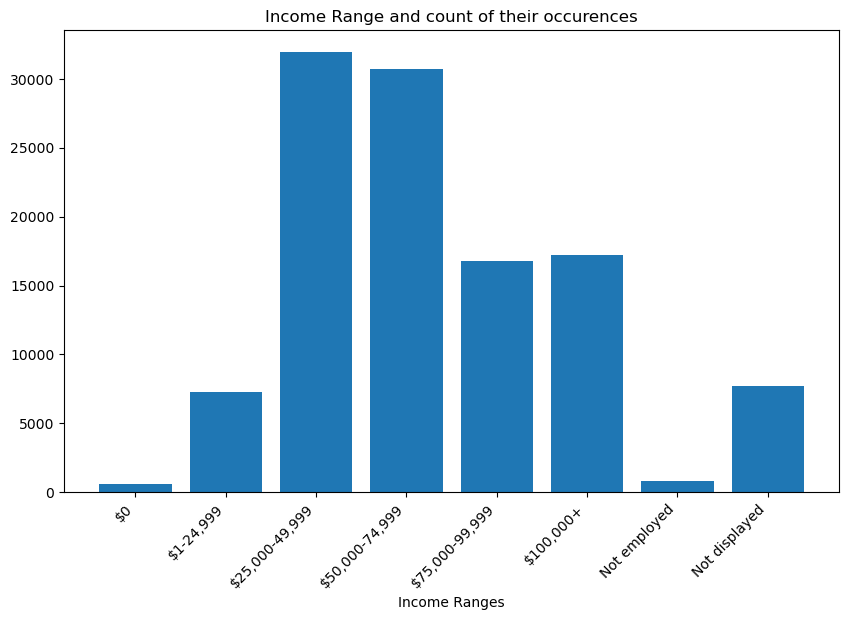

In [13]:
in_range = copy_df.IncomeRange.value_counts()
in_range_nor = copy_df.IncomeRange.value_counts(normalize=True)
print(in_range_nor)

#I want to have columns in given order, not to be sorted by count of occurences
income_ranges = ["$0", "$1-24,999", "$25,000-49,999", "$50,000-74,999", "$75,000-99,999", "$100,000+", "Not employed", "Not displayed"]
in_range = in_range.loc[income_ranges]

plt.figure(figsize=(10, 6))
plt.bar(in_range.index, in_range.values)
plt.xlabel("Income Ranges")
plt.title("Income Range and count of their occurences")
plt.xticks(rotation=45, ha="right");


Majority (ca. 55%) of customers are falling within income range 25-75k

What are they taking the loans for?

In [14]:
#map categories so it's easier to read them on a viz
list_dict = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
             4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 
             9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
             13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle',
             17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

copy_df['ListingCategory'] = copy_df['ListingCategory (numeric)'].map(list_dict)
copy_df.drop(['ListingCategory (numeric)'], axis=1, inplace=True)


In [15]:
def create_bar_chart(data_frame, column_name, figsize=(12, 6), title=None):
 
    value_counts = data_frame[column_name].value_counts(normalize=True)
    value_counts = value_counts.sort_values(ascending=False)

    plt.figure(figsize=figsize)
    ax = value_counts.plot(kind='bar')

    # Add labels and a title
    plt.xlabel(column_name)
    plt.title(title)

    # Show percentages on the y-axis
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0%}'))

    # Show the chart
    plt.show()



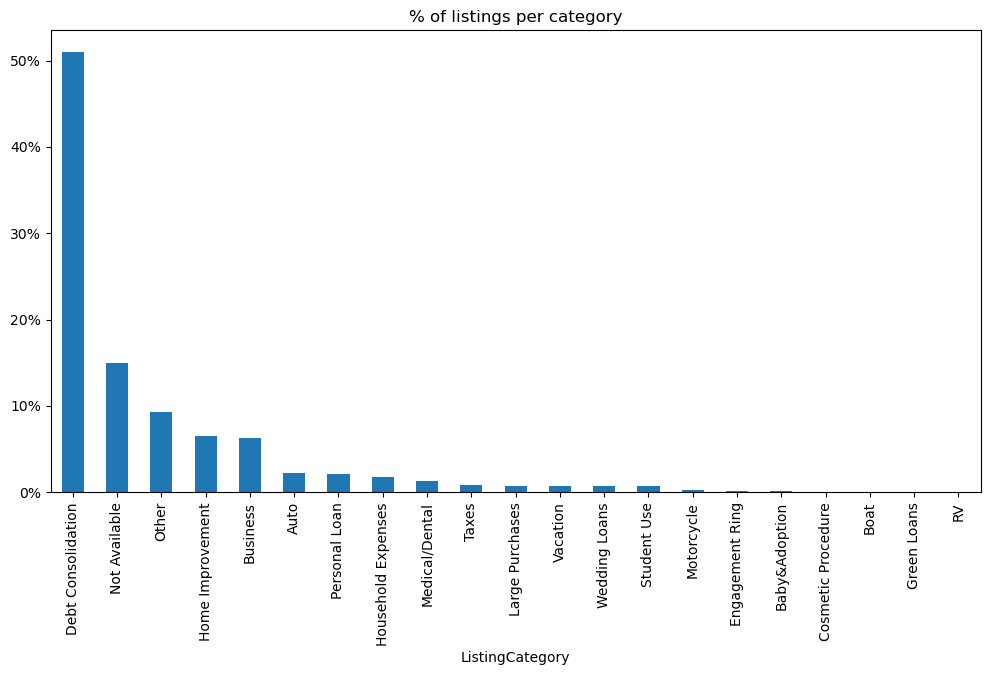

In [16]:
create_bar_chart(copy_df, 'ListingCategory',title='% of listings per category')

>The Top 5 categories are:
1 - Debt consolidaton
0 - not available
7 - other
3 - Business
2 - Home improvement
>With about 50% of loans being due to debt consolidation, so there's really no specific information about the purpose. We do not have appropriate data for ca. 15% and medical/dental category makes about 2% of dataset, so this does not seem to be like reasonable category to explore

How many loans are current/completed/defaulted?

In [17]:
print(copy_df.LoanStatus.unique())

['Completed' 'Current' 'Past Due (1-15 days)' 'Defaulted' 'Chargedoff'
 'Past Due (16-30 days)' 'Cancelled' 'Past Due (61-90 days)'
 'Past Due (31-60 days)' 'Past Due (91-120 days)' 'FinalPaymentInProgress'
 'Past Due (>120 days)']


C:\Users\pauli\anaconda3\envs\udacity_project_2\lib\site-packages\ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


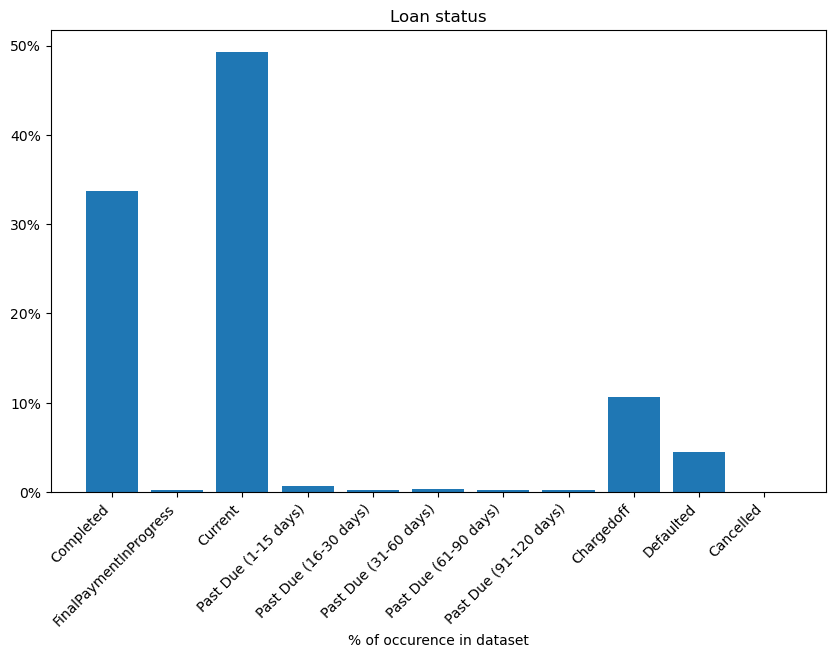

In [18]:
value_counts = copy_df['LoanStatus'].value_counts(normalize=True)

loan_status = ['Completed', 'FinalPaymentInProgress', 'Current', 'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Chargedoff', 'Defaulted', 'Cancelled']

# Convert value_counts to a Categorical with specified order
value_counts = value_counts.loc[loan_status]

plt.figure(figsize=(10, 6))
plt.bar(value_counts.index, value_counts.values)
plt.xlabel("% of occurence in dataset")
plt.title('Loan status')
ax = plt.gca()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
plt.xticks(rotation=45, ha="right");


For the sake of this analysis, I'm going to make one bucket for all "Past Due" categories

In [19]:
# defining a mapping of values to be replaced
replacement_mapping = {'Past Due (1-15 days)': 'Past Due', 'Past Due (31-60 days)': 'Past Due', 'Past Due (61-90 days)': 'Past Due', 'Past Due (91-120 days)':'Past Due','Past Due (16-30 days)':'Past Due','Past Due (>120 days)':'Past Due'}  
copy_df['LoanStatus'] = copy_df['LoanStatus'].replace(replacement_mapping)

In [20]:
#check
value_counts = copy_df['LoanStatus'].value_counts(normalize=True)
print(value_counts)

Current                   0.492902
Completed                 0.336629
Chargedoff                0.106063
Defaulted                 0.044373
Past Due                  0.018193
FinalPaymentInProgress    0.001795
Cancelled                 0.000044
Name: LoanStatus, dtype: float64


Around 5% of customers defaulted and 2% are late with their payment

Now let's look like at columns that may be affecting customer rates, like homeownership (if there is collateral in form of home ownership, this may lead to lower rates) or whether income is verifiable.
Since these will be True/False columns, I decded to visualise these in form of pie charts

In [21]:
def create_pie_chart(data, column_name, title):
    # Get value counts for the specified column
    counts = data[column_name].value_counts()

    # Create a pie chart
    plt.figure(figsize=(5, 5))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(title)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Display the chart
    plt.show()


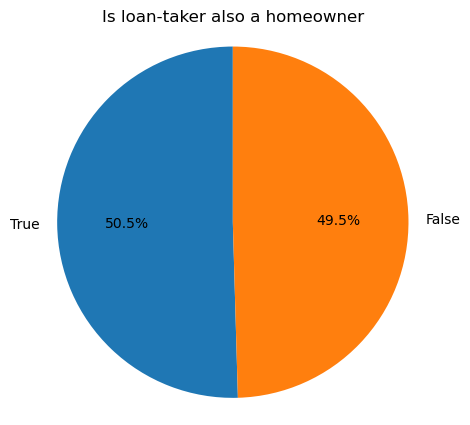

In [22]:
create_pie_chart(copy_df, 'IsBorrowerHomeowner', "Is loan-taker also a homeowner")


50.5% of loan-takers are also homeowners

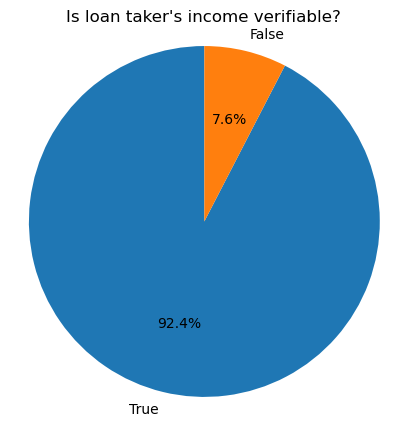

In [23]:
#if we are not able to verify their income they might have bigger rates

create_pie_chart(copy_df, 'IncomeVerifiable', "Is loan taker's income verifiable?")

Income data could not be verified for 7.6% of borrowers

Let's take a look at employment's status of loan takers, as this might also affect the rate they are offered

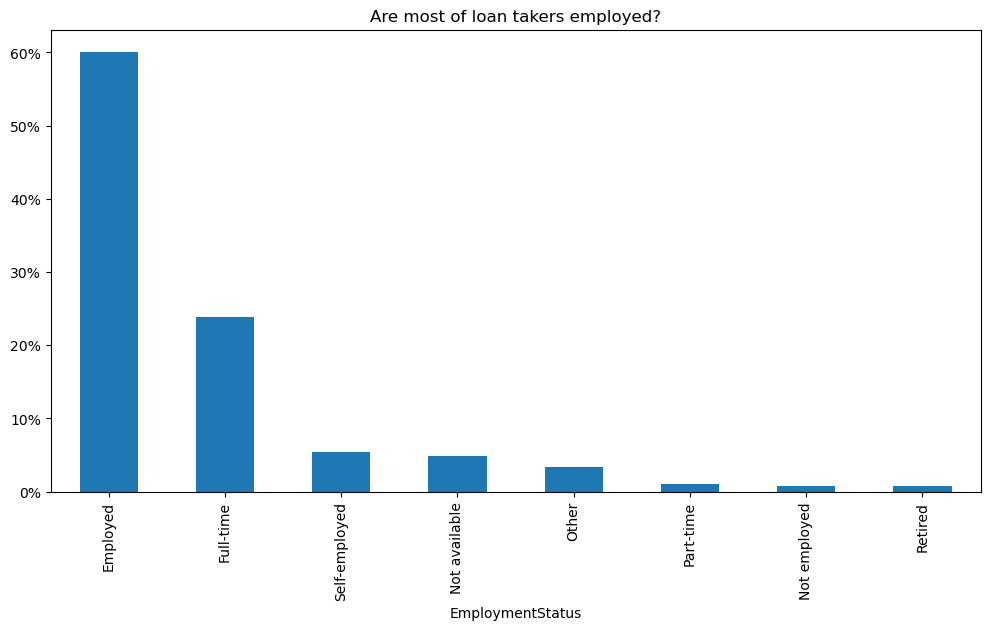

In [24]:
create_bar_chart(copy_df, 'EmploymentStatus',title='Are most of loan takers employed?')

60% of loan takers are employed, 25% are working full time, less than 10% are self-employed

Now let's take a look at distribution of numeric variables

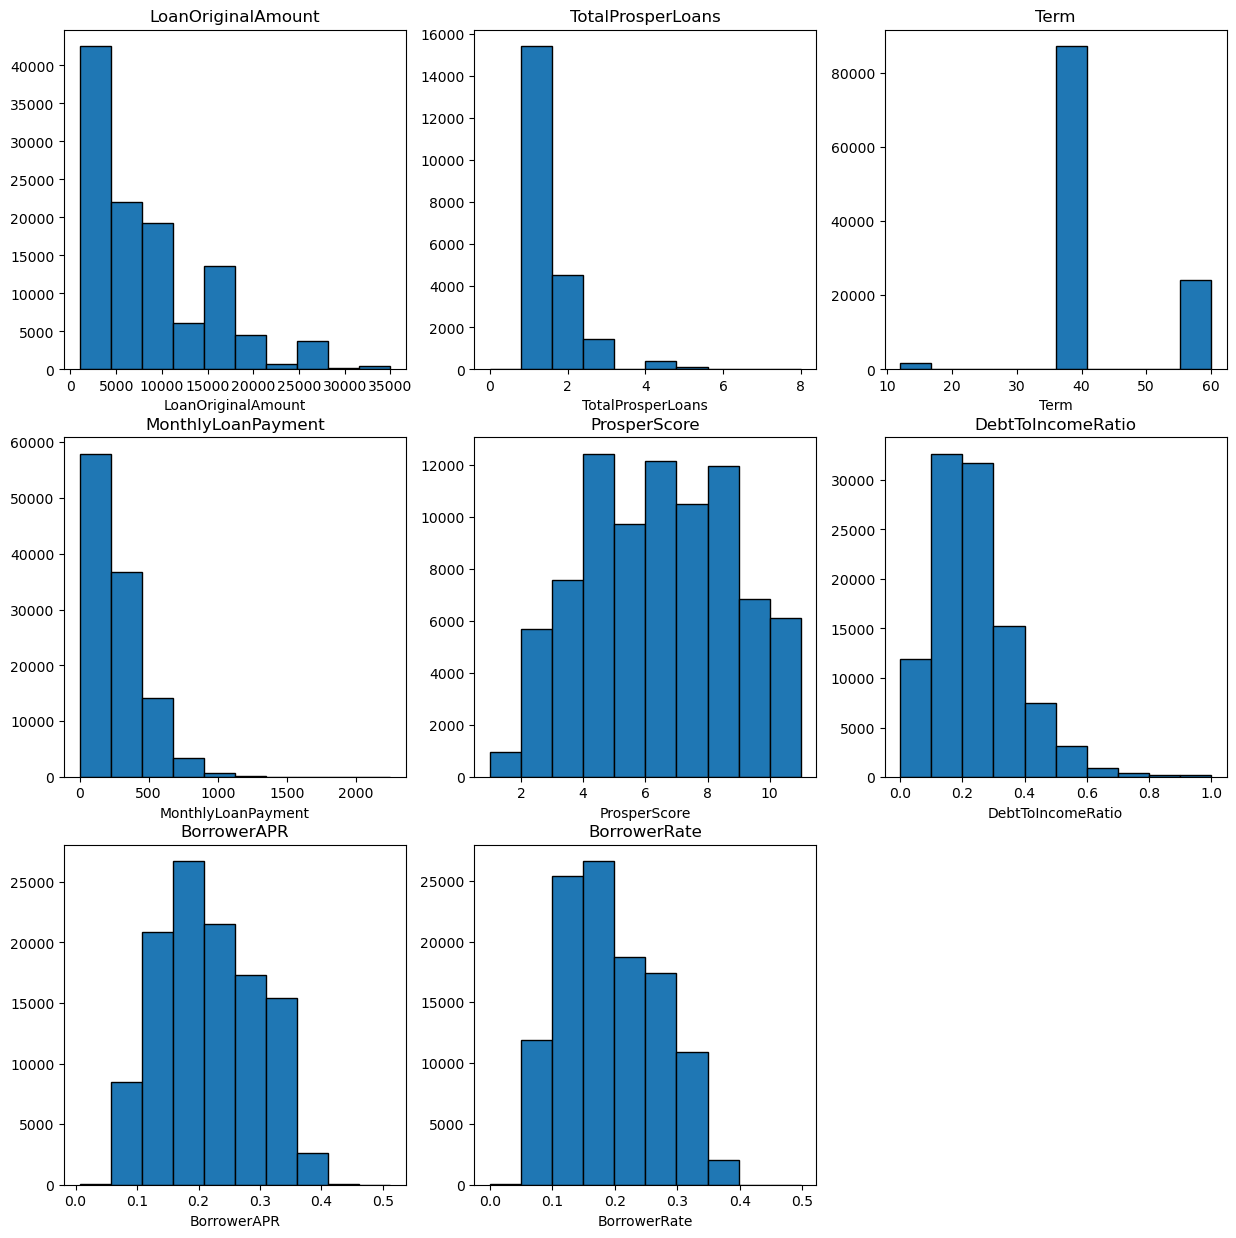

In [25]:
columns = ['LoanOriginalAmount', 'TotalProsperLoans', 'Term', 'MonthlyLoanPayment', 'ProsperScore', 'DebtToIncomeRatio','BorrowerAPR', 'BorrowerRate']
num_bins = 10 

plt.figure(figsize=(15, 15))

for column in columns:
    plt.subplot(3, 3, columns.index(column) + 1)  
    if column == 'DebtToIncomeRatio':
    #debttoincome ratio has its cap at 10, but it made the histogram impossible to read
        plt.hist(copy_df[column], bins=num_bins, edgecolor='black', range=(0, 1))
    else:
        plt.hist(copy_df[column], bins=num_bins, edgecolor='black')

    plt.title(f'{column}')
    plt.xlabel(column)

>From histograms we see that majority of loans have less than 5k value, for most of loan-takers it's their first loan with Prosper (the value is null, hence not showed in histogram), and most of loans are given for the term between 35-40 months (? to be explored further). 

>Monthly payment for majority of loans is lower than 500 dollars, loan takers are quite burdened with debt (for most of them their monthly liabilities are taking 10-30% of their monthly income). Most borrowers have APR between 1.5-2.5%

Let's take a look at income distribution

In [26]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print(copy_df.StatedMonthlyIncome.describe())

count    113065.00
mean       5605.11
std        7495.63
min           0.00
25%        3199.33
50%        4666.67
75%        6825.00
max     1750002.92
Name: StatedMonthlyIncome, dtype: float64


There is quite big spread of values and it might be better to categorise them to lower/middle/upper middle/upper class

In [27]:
copy_df['IncomeCategory'] = pd.cut(
    copy_df['StatedMonthlyIncome'],
    bins=[-float('inf'), 4000, 7500, 12500, float('inf')],
    labels=['Lower', 'Middle', 'Upper Middle', 'Upper'],
    include_lowest=True
)

How Prosper is rating the credit profile of its borrowers?

There are two columns that have information regarding credit risk, one is having info before 2009, and second after - it's better to have this info together as part of one column

In [28]:
# create new variable CreditRating which combines the two rating columns
copy_df['CreditRating'] = np.where(copy_df['CreditGrade'].isnull(), copy_df['ProsperRating (Alpha)'], copy_df['CreditGrade'])

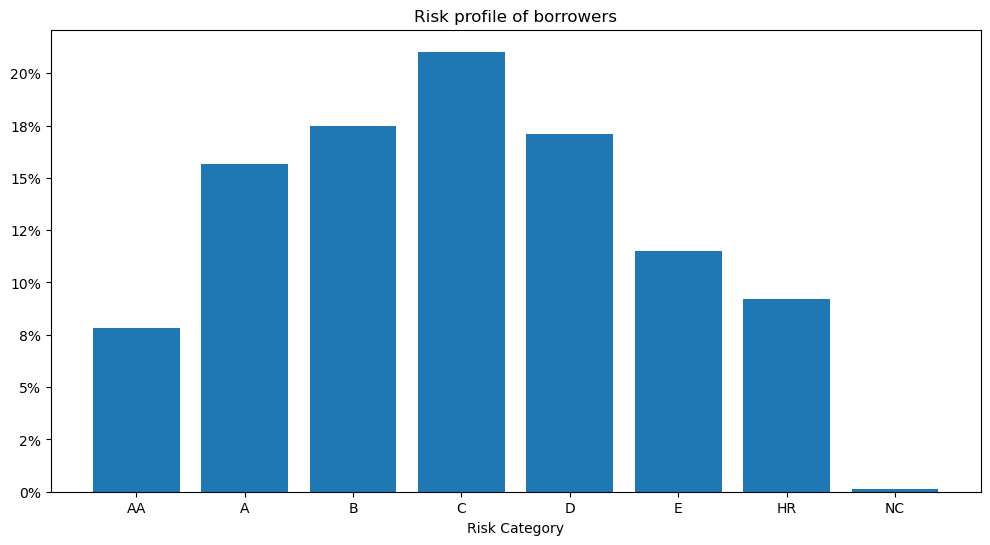

In [29]:
value_counts_rat = copy_df['CreditRating'].value_counts(normalize=True)
value_counts_rat = value_counts_rat.sort_values()
risk_cat = ["AA","A","B","C","D","E","HR","NC"]
value_counts_rat = value_counts_rat.loc[risk_cat]

plt.figure(figsize=(12, 6))  # Set the figure size
plt.bar(value_counts_rat.index, value_counts_rat.values)

#Add labels and a title
plt.xlabel('Risk Category')
plt.title('Risk profile of borrowers')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0%}'))

# Show the chart
plt.show()


Almost 60% of loans granted by Prosper are granted to Medium Risk Borrower - categories B, C and D

In [30]:
#clean-up and drop previous rating columns
copy_df.drop(['CreditGrade', 'ProsperRating (Alpha)'], axis=1, inplace=True)

In [31]:
# Map credit ratings to risk categories
risk_mapping = {'AA': 'Low Risk', 'A': 'Low Risk', 'B': 'Medium Risk', 'C': 'Medium Risk', 'D': 'Medium Risk',
                'E': 'High Risk', 'HR': 'High Risk', 'NC': 'High Risk'}
copy_df['RiskCategory'] = copy_df['CreditRating'].map(risk_mapping)

Let's take a look at how distribution of loan amounts is looking

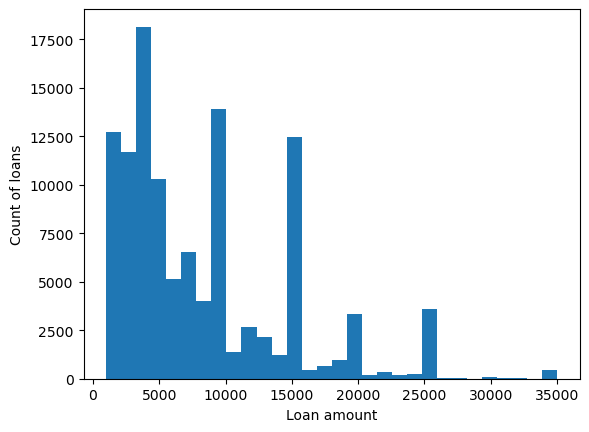

In [32]:
#how loan amounts are looking?
plt.hist(copy_df.LoanOriginalAmount, bins=30)  
plt.ylabel('Count of loans')
plt.xlabel('Loan amount');

In [33]:
print(copy_df.LoanOriginalAmount.describe())

count   113065.00
mean      8314.81
std       6237.01
min       1000.00
25%       4000.00
50%       6300.00
75%      12000.00
max      35000.00
Name: LoanOriginalAmount, dtype: float64


We see spikes in "round" numbers, like  10k or 15k. Maximum amount of loan is 35k, and 75% of them are below 12k, so it doesn't seem like Prosper is granting big loan values 

And last but not least, let's take a look at term loans, as in histogram the values shown were quite unusual

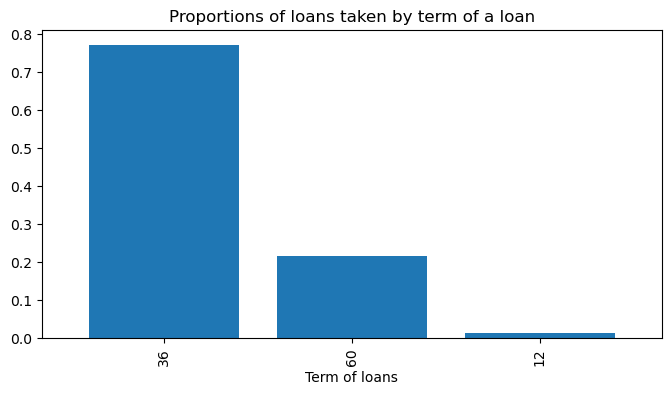

In [34]:
value_counts_term = copy_df['Term'].value_counts(normalize=True)

plt.figure(figsize=(8, 4))  # Set the figure size
value_counts_term.plot(kind='bar', width=0.8)

#Add labels and a title
plt.xlabel('Term of loans')
plt.title('Proportions of loans taken by term of a loan')

# Show the chart
plt.show()

Prosper is granting loans for 1, 3 or 5 years-time, but almost 80% of loans are actually given for 3 years

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

Relationships I'd like to focus in in this part of analysis

Is employment type having any impact on income?
Is term of loans affecting amount of monthly payments?
Do high risk categories default with higher frequency?
What type of loans are associated with highest rates?
Is having a home impacting how big of a loan you will get?

In [35]:
#define function for heatmap

def create_heatmap(data, x_column, y_column, title, vmin=0, vmax=1):
    # Create a cross-tabulation
    cross_tab = pd.crosstab(data[x_column], data[y_column], normalize='index')

    # Create a heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='.2%', vmin=vmin, vmax=vmax)
    plt.title(title)
    plt.xlabel(y_column)
    plt.ylabel(x_column)
    plt.show()





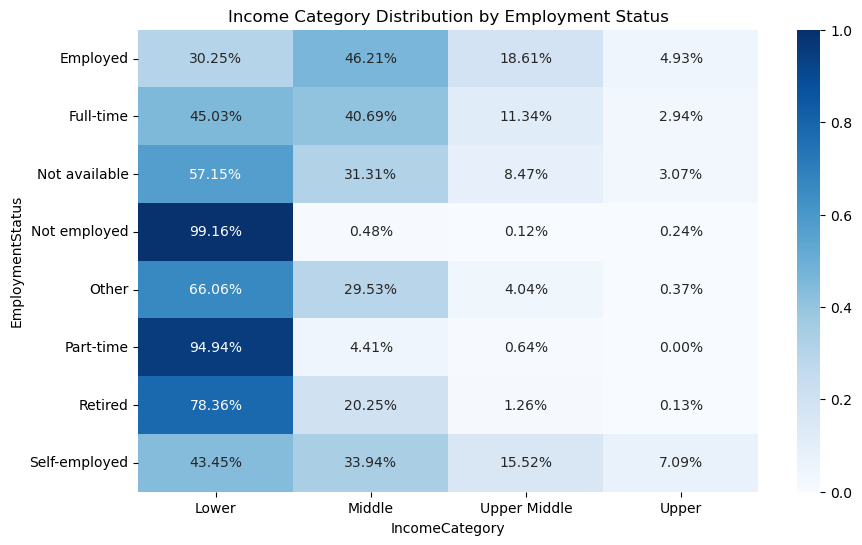

In [36]:
create_heatmap(copy_df, 'EmploymentStatus', 'IncomeCategory', 'Income Category Distribution by Employment Status')

Where you are employed, working full time or are self-employed, there are biggest changes that you will be at least middle class

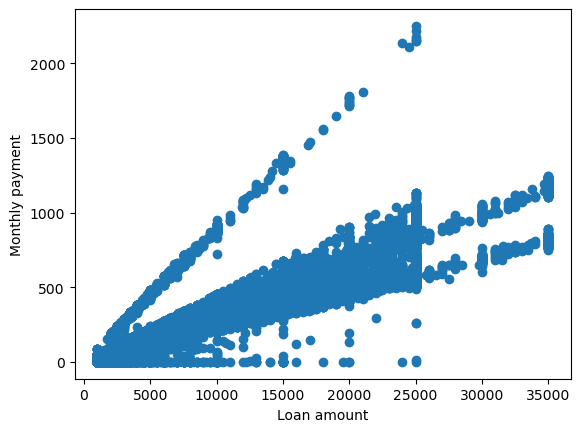

In [37]:
plt.scatter(data = copy_df, x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment')
# plt.plot([10,60], [10,60]) # diagonal line from (10,10) to (60,60)
plt.xlabel('Loan amount')
plt.ylabel('Monthly payment');

There seems to be a clear positive correlation between the amount of loan taken and how much the monthly repayment is

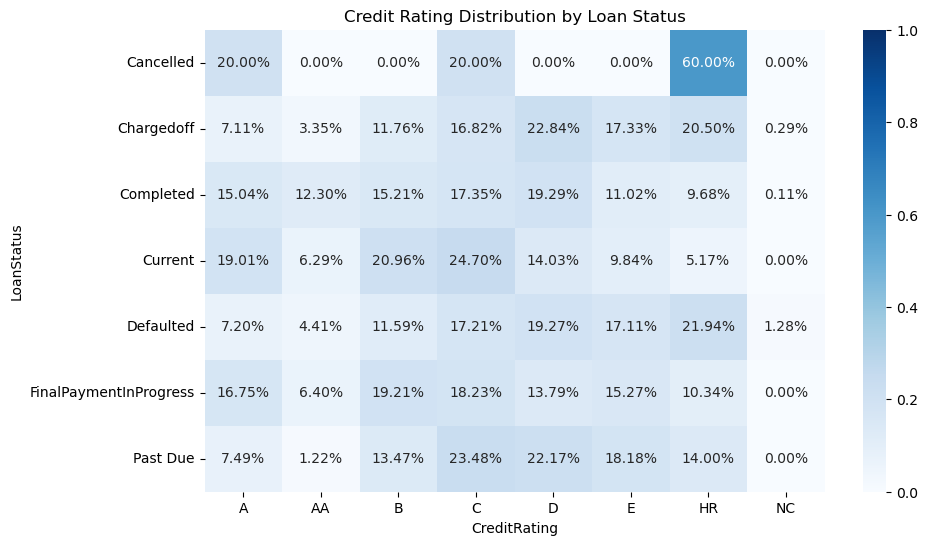

In [38]:
create_heatmap(copy_df, 'LoanStatus', 'CreditRating', 'Credit Rating Distribution by Loan Status')

In [39]:
high_risk_df = copy_df[copy_df['RiskCategory'] == 'High Risk']
print(high_risk_df['LoanStatus'].value_counts(normalize=True))

Current                  0.35
Completed                0.34
Chargedoff               0.19
Defaulted                0.09
Past Due                 0.03
FinalPaymentInProgress   0.00
Cancelled                0.00
Name: LoanStatus, dtype: float64


It's visible that Prosper has a rather approproate system of assigning credit risk - we see that the highest number of defaulted customers had already assigned "High Risk" category. 40% of defaulted customers had already assigned highest risk categories, so the next question might be whether Prosper is compensating for this higher risk with higher Borrower APR?


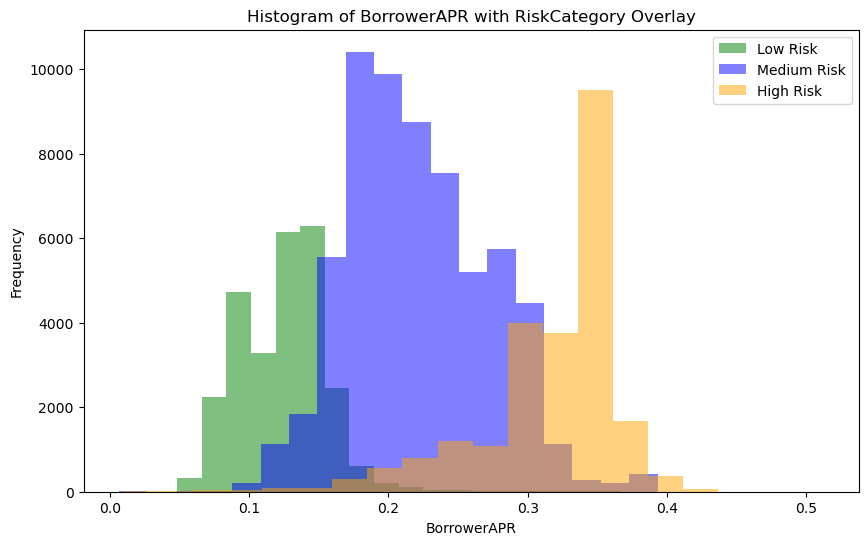

In [40]:
colors = {'Low Risk': 'green', 'Medium Risk': 'blue', 'High Risk': 'orange'}

# Create a histogram with colored bars
plt.figure(figsize=(10, 6))
for risk_category, color in colors.items():
    plt.hist(copy_df[copy_df['RiskCategory'] == risk_category]['BorrowerAPR'], bins=20, alpha=0.5, label=risk_category, color=color)

plt.title('Histogram of BorrowerAPR with RiskCategory Overlay')
plt.xlabel('BorrowerAPR')
plt.ylabel('Frequency')
plt.legend()
plt.show()

This indeed is the case, we clearly see that Prosper is compensating this higher risk with higher rates given to customers with E and HR ratings

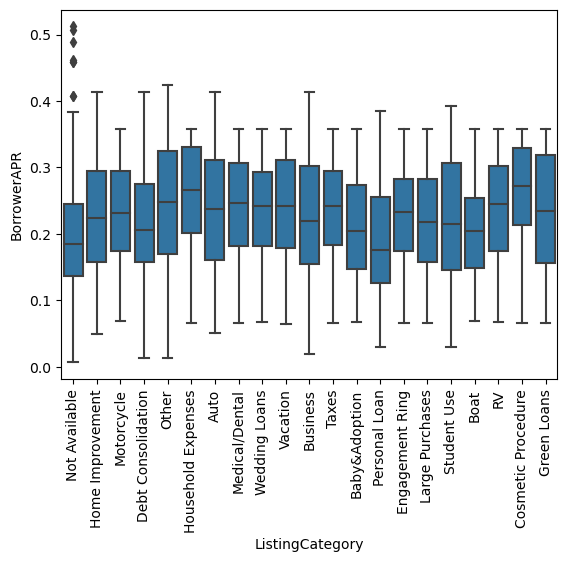

In [41]:
base_color = sns.color_palette()[0]

sns.boxplot(data=copy_df, x='ListingCategory', y='BorrowerAPR', color=base_color)
plt.xticks(rotation=90);

Loans taken for Cosmedic procedures and Household expenses have highest median BorrowerAPR


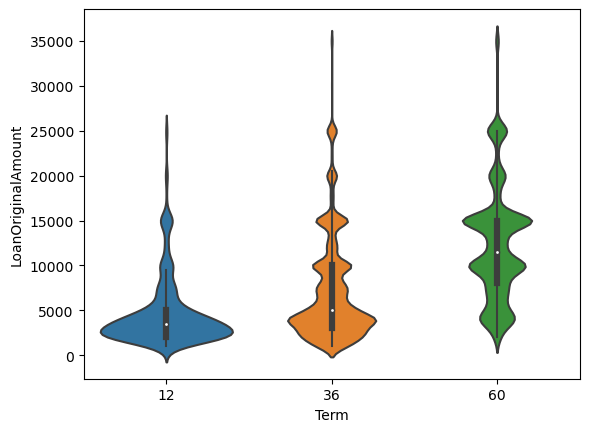

In [42]:
sns.violinplot(data=copy_df, x='Term', y='LoanOriginalAmount');

People with loan taken for 12 months are usually talking up to 5k of loan value, the values of loans are getting bigger as term gets longer

And last but not least, let's check the correlation between some numerical variables in dataset and Borrower APR  moderate correlation holds true for whole dataset as well, there is also moderate negative correlation (meaning as this value tends to decrease, then BorrowerAPR tends to increase) between LoanOriginalAmount and AvailableBankcardCredit 

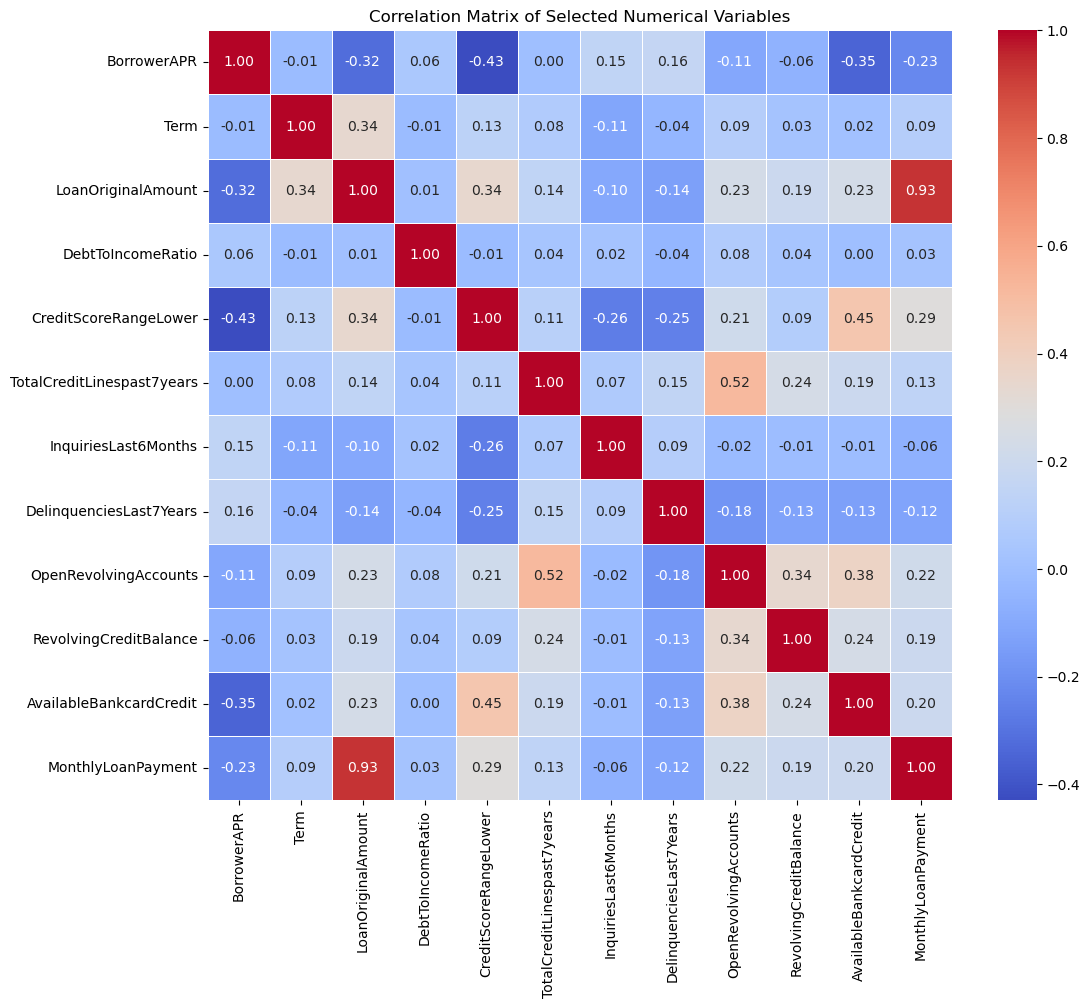

In [44]:
numerical_variables = [
    'BorrowerAPR',
    'Term',
    'LoanOriginalAmount',
    'DebtToIncomeRatio',
    'CreditScoreRangeLower',
    'TotalCreditLinespast7years',
    'InquiriesLast6Months',
    'DelinquenciesLast7Years',
    'OpenRevolvingAccounts',
    'RevolvingCreditBalance',
    'AvailableBankcardCredit',
    'MonthlyLoanPayment'
]
    

# Create a correlation matrix
correlation_matrix_w = copy_df[numerical_variables].corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_w, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Selected Numerical Variables')
plt.show()

There is a moderate negative correlation (meaning as this value tends to decrease, then BorrowerAPR tends to increase) between BorrowerAPR and lower bound of credit score, LoanOriginalAmount and AvailableBankcardCredit

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In this part, I'd like to focus on:
>we saw that when someone has higher profile risk, he gets higher rates, but is having a home somehow affecting that?


>loan origination amount & Term & borrower APR - are they charging also higher interest rates on shorter loans?  

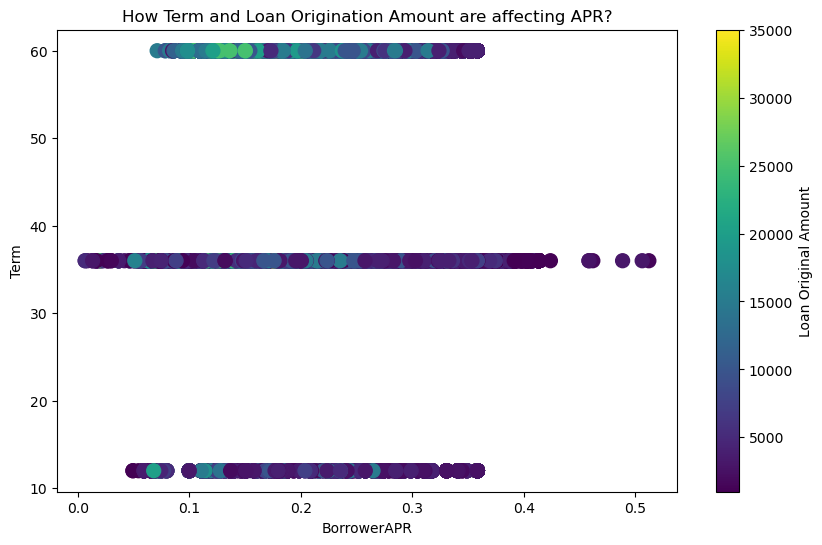

In [45]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(copy_df['BorrowerAPR'], copy_df['Term'], c=copy_df['LoanOriginalAmount'], s=100)
plt.colorbar(scatter, label='Loan Original Amount')
plt.title('How Term and Loan Origination Amount are affecting APR?')
plt.xlabel('BorrowerAPR')
plt.ylabel('Term')
plt.show()

We actually see, that for longer term and smaller the value of loans, the higher interest rate it has applied - the highest amounts tend to rather sit within longer terms and have less than 0.2 APR rate

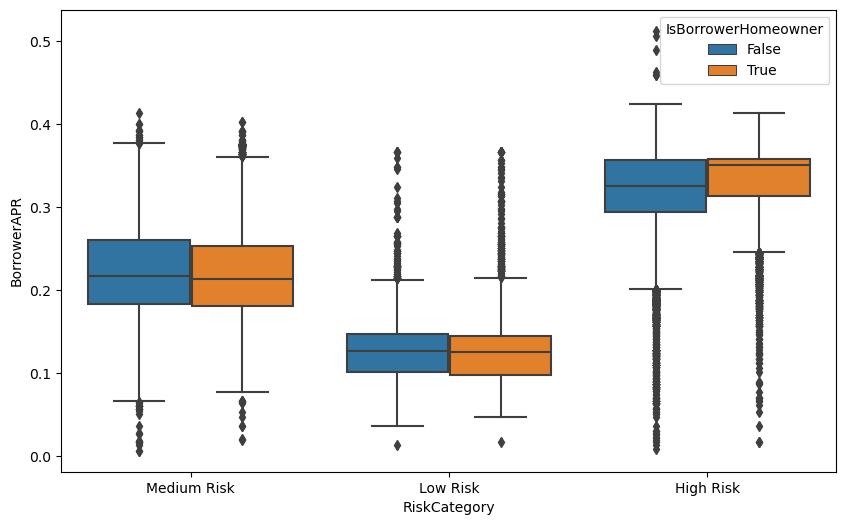

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='RiskCategory', y='BorrowerAPR', hue='IsBorrowerHomeowner', data=copy_df);

Interestingly, for both Medium and Low risk categories the fact whether someone is homeowner is not really meaningfully impacting the APR rate, but homeownership actually negatively impacts the ones with higher risk and their loans have higher rates - what is this due to?

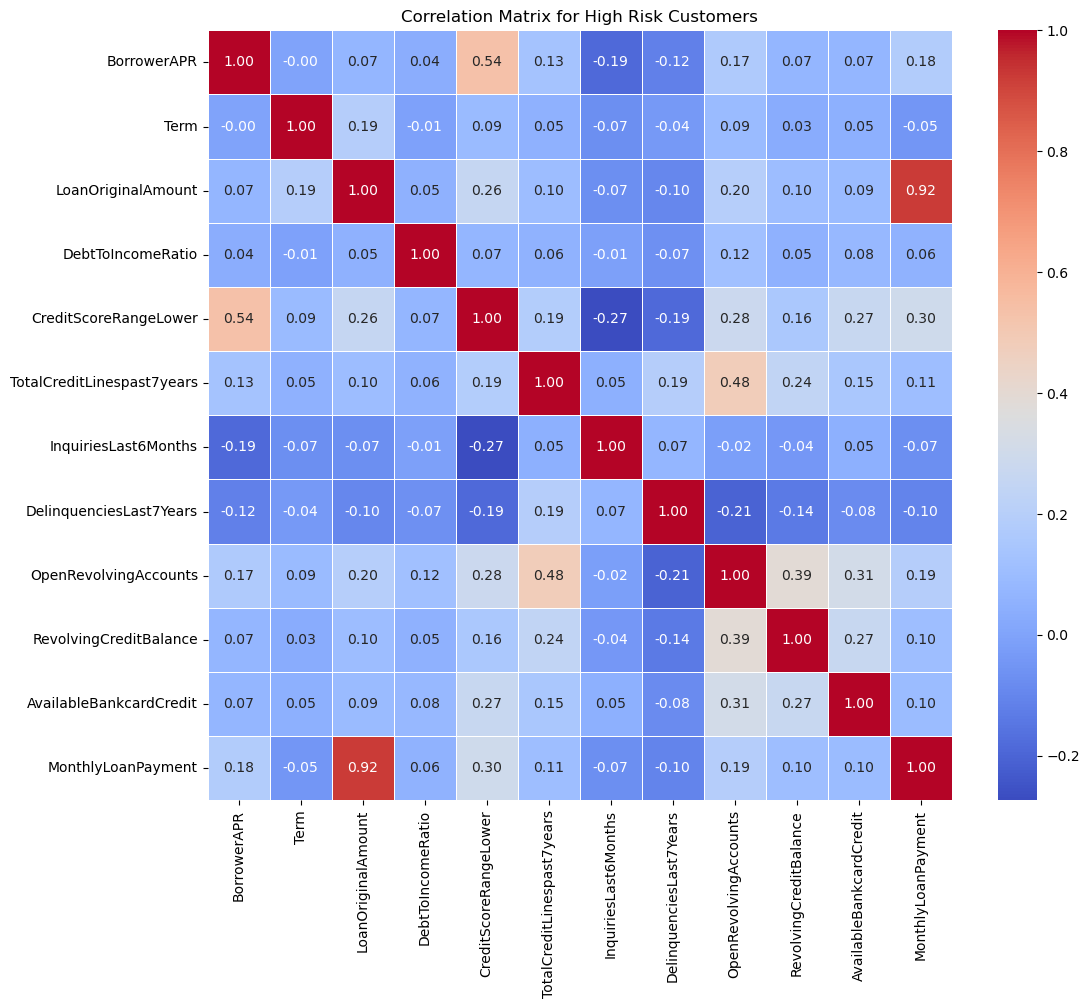

In [47]:
high_risk_df = copy_df[copy_df['RiskCategory'] == 'High Risk']

# Create a correlation matrix
correlation_matrix = high_risk_df[numerical_variables].corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix for High Risk Customers')
plt.show()

#I realise this should be part of bivariate analysis but from the perspective of analysis flow it rather fits here 

Similarly to correlation matrix for the whole dataset, for High Risk customers the variable that has most negative impact on BorrowerAPR (from customer's perspective) is lower bound of credit score

## Conclusions
> It's visible that Prosper has a rather approproate system of assigning credit risk - we see that the highest number of defaulted customers had already assigned "High Risk" category. 40% of defaulted customers had already assigned highest risk categories
> Prosper is compensating this higher risk with higher rates given to customers with E and HR ratings
> The longer the term and the smaller the value of loans, the higher interest rate it has applied - the highest amounts tend to rather sit within longer terms and have less than 0.2 APR rate
> Variable that has most negative impact on BorrowerAPR (from customer's perspective) for High Risk Customers is lower bound of credit score
> There were some additional steps needed in form of re-mappings and categorising some variables in order to convey some meaningful information. The dataset is large and comprises of many columns

Getting wrangled dataset saved into the same folder, so it can be used later on in slide-show

In [48]:
import os
notebook_folder = os.getcwd()
file_name = 'wrangled_data.csv'
file_path = os.path.join(notebook_folder, file_name)
copy_df.to_csv(file_path, index=False)